In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from xgboost import XGBRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from pprint import pprint

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score


In [9]:
df = pd.read_csv(r'C:\Users\RDITLBMJ\Documents\Data_ML\waterquality.csv')
df.head()

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [11]:
df = df.drop(columns=['STATION CODE','LOCATIONS', 'STATE'])
df

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [13]:
# Filling Null Values using K-Nearest Neighbor Imputation
impute_knn = KNNImputer(n_neighbors=5,weights='distance')
df_imputed = impute_knn.fit_transform(df)

In [15]:
df = pd.DataFrame(df_imputed, columns=['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM'])
df

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [17]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.DO,0.20,9.5)
df['sub_indx_DO']=x

In [19]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.pH,0.15,7.5)
df['sub_indx_pH']=x

In [21]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.CONDUCTIVITY,0.10,1000)
df['sub_indx_CONDUCTIVITY']=x

In [23]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.BOD,0.15,3)
df['sub_indx_BOD']=x

In [25]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.NITRATE_N_NITRITE_N,0.10,5)
df['sub_indx_NITRATE_N_NITRITE_N']=x

In [27]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.FECAL_COLIFORM,0.15,500)
df['sub_indx_FECAL_COLIFORM']=x

In [29]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.TOTAL_COLIFORM,0.15,2500)
df['sub_indx_TOTAL_COLIFORM']=x

In [31]:
sum_sub_indx=df.iloc[:,8:]
final_wqi=sum_sub_indx.sum(axis=1)
final_wqi

0      58.551684
1      54.083579
2      72.296947
3      70.386947
4      54.262000
         ...    
529    39.077158
530    46.167474
531    47.246526
532    51.873579
533    81.586421
Length: 534, dtype: float64

In [33]:
df['WQI']=final_wqi
df

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,sub_indx_DO,sub_indx_pH,sub_indx_CONDUCTIVITY,sub_indx_BOD,sub_indx_NITRATE_N_NITRITE_N,sub_indx_FECAL_COLIFORM,sub_indx_TOTAL_COLIFORM,WQI
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,13.473684,16.2,7.35,17.0,4.00,0.09,0.438,58.551684
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,12.631579,16.0,2.70,15.5,4.00,2.16,1.092,54.083579
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,11.578947,15.6,3.55,21.0,18.00,1.77,0.798,72.296947
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,11.578947,15.6,3.71,28.0,7.10,2.70,1.698,70.386947
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,12.000000,15.8,2.94,16.0,5.38,1.35,0.792,54.262000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0,9.263158,16.2,5.38,6.0,2.00,0.15,0.084,39.077158
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0,11.789474,16.8,5.91,5.5,6.00,0.12,0.048,46.167474
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0,12.210526,17.0,5.88,6.0,6.00,0.12,0.036,47.246526
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0,8.631579,15.8,11.33,11.5,4.00,0.21,0.402,51.873579


In [36]:
# saving the dataframe
df.to_csv('WQI.csv', index=False)

In [40]:
df_WQI = pd.read_csv(r'C:\Users\RDITLBMJ\Documents\WQI.csv')
df_WQI.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,sub_indx_DO,sub_indx_pH,sub_indx_CONDUCTIVITY,sub_indx_BOD,sub_indx_NITRATE_N_NITRITE_N,sub_indx_FECAL_COLIFORM,sub_indx_TOTAL_COLIFORM,WQI
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,13.473684,16.2,7.35,17.0,4.00,0.09,0.438,58.551684
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,12.631579,16.0,2.70,15.5,4.00,2.16,1.092,54.083579
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,11.578947,15.6,3.55,21.0,18.00,1.77,0.798,72.296947
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,11.578947,15.6,3.71,28.0,7.10,2.70,1.698,70.386947
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,12.000000,15.8,2.94,16.0,5.38,1.35,0.792,54.262000


In [42]:
X = df.drop(columns=['WQI'])
y = df['WQI']

In [44]:
y_df = pd.DataFrame(y)

In [46]:
y_df

,WQI
0,58.551684
1,54.083579
2,72.296947
3,70.386947
4,54.262000
...,...
529,39.077158
530,46.167474
531,47.246526
532,51.873579


In [48]:
# Standardizing Data Using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y_df)

In [50]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=42, test_size=0.2)

In [54]:
y_train = y_train.ravel()

In [56]:
svr = SVR(kernel='linear') 

In [58]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [60]:
y_pred = svr.predict(X_test)

In [62]:
# Evaluation of Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}', f'Mean Squared Error: {mse}', f'R2 Score: {r2}')

Mean Absolute Error: 0.023418225107134226 Mean Squared Error: 0.001132744665659498 R2 Score: 0.9995981059109061


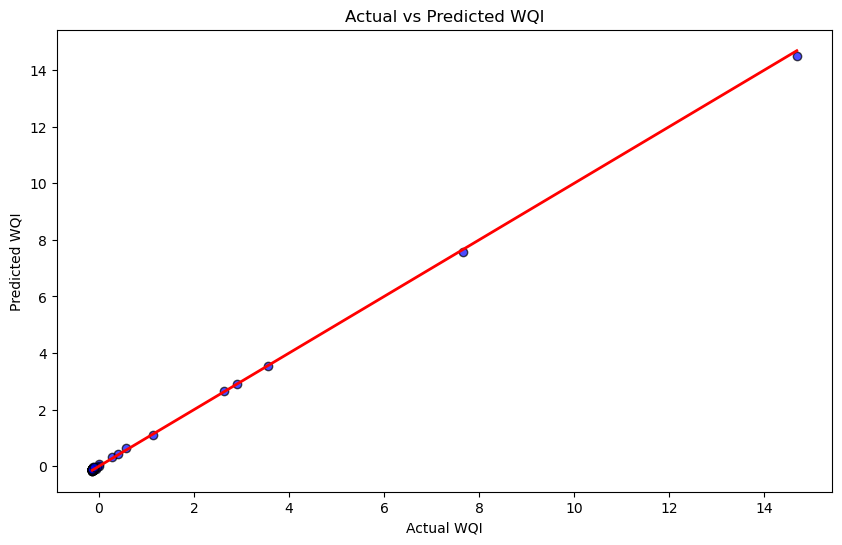

In [70]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.title('Actual vs Predicted WQI')
plt.show()